# Module 2, first lab practice
## Dataset: Kaggle data of titanic 
## Analysis method: simple linear regression

##### NOTE: Italic sentences are for noting extra code for errors or pre-processing
##### This dataset is not appropriate for Simple Linear Regression because independent variable is binary. Still, I tried to apply Simple linear regression and practice plots and pre-processing of this data.  


## Data Dictionary

#### Variable	Definition	Key
survival:	Survival	0 = No, 1 = Yes
pclass:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex:	Sex	
Age:	Age in years	
sibsp:	# of siblings / spouses aboard the Titanic	
parch:	# of parents / children aboard the Titanic	
ticket:	Ticket number	
fare:	Passenger fare	
cabin:	Cabin number	
embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

#### Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

importing packages and downloading data.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import copy
%matplotlib inline

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [7]:
titanic = pd.read_csv('C:/Users/Juyeon/Desktop/My folder/data analysis/titanic/train.csv')

Data exploration

In [8]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Selecting data to explore more

In [13]:
sdf = titanic[['Pclass','Age','Fare','Sex','Parch','SibSp','Cabin','Ticket','Embarked','Survived']]
sdf.head()

,Pclass,Age,Fare,Sex,Parch,SibSp,Cabin,Ticket,Embarked,Survived
0,3,22.0,7.2500,male,0,1,NaN,A/5 21171,S,0
1,1,38.0,71.2833,female,0,1,C85,PC 17599,C,1
2,3,26.0,7.9250,female,0,0,NaN,STON/O2. 3101282,S,1
3,1,35.0,53.1000,female,0,1,C123,113803,S,1
4,3,35.0,8.0500,male,0,0,NaN,373450,S,0


### Pre-processing

In [11]:
sdf.info()
sdf.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Pclass      891 non-null int64
Age         714 non-null float64
Fare        891 non-null float64
Sex         891 non-null object
Parch       891 non-null int64
SibSp       891 non-null int64
Cabin       204 non-null object
Ticket      891 non-null object
Embarked    889 non-null object
Survived    891 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


Pclass        0
Age         177
Fare          0
Sex           0
Parch         0
SibSp         0
Cabin       687
Ticket        0
Embarked      2
Survived      0
dtype: int64

### Data Preprocessing- na value 
#### Cabin : extract from dataframe, or replace with "" (space)
#### Age: mean
#### Embarked: frequent


In [15]:
import copy

In [16]:
ar = copy.deepcopy(sdf)
#copy of dataframe 

### Age <- replace null value with mean value, change data type as int  

In [17]:
print(sdf['Age'].mean())
mean_age=29

29.69911764705882


In [18]:
ar['Age'].fillna(mean_age,inplace=True)

In [19]:
print("# of missing value in Age: "+ str(ar['Age'].isnull().sum()))

# of missing value in Age: 0


In [20]:
ar['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5      29.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17     29.0
18     31.0
19     29.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26     29.0
27     19.0
28     29.0
29     29.0
       ... 
861    21.0
862    48.0
863    29.0
864    24.0
865    42.0
866    27.0
867    31.0
868    29.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878    29.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888    29.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [21]:
ar[["Age"]] = ar[["Age"]].astype("int")

In [22]:
ar.dtypes

Pclass        int64
Age           int32
Fare        float64
Sex          object
Parch         int64
SibSp         int64
Cabin        object
Ticket       object
Embarked     object
Survived      int64
dtype: object

### Embarked <- freqent data 

In [23]:
from collections import Counter

cnt = Counter(ar['Embarked']) 

print(cnt.most_common()[:2]) 

[('S', 644), ('C', 168)]


In [24]:
ar['Embarked'].replace(np.nan, 'S', inplace=True)

In [25]:
ar['Embarked'].isnull().sum()

0

In [26]:
ar.isnull().sum()

Pclass        0
Age           0
Fare          0
Sex           0
Parch         0
SibSp         0
Cabin       687
Ticket        0
Embarked      0
Survived      0
dtype: int64

### Cabin < - replace with ""

In [27]:
ar['Cabin'].replace(np.nan, "", inplace = True)

In [28]:
ar['Cabin']
ar.isnull().sum()

Pclass      0
Age         0
Fare        0
Sex         0
Parch       0
SibSp       0
Cabin       0
Ticket      0
Embarked    0
Survived    0
dtype: int64

#### Outliers

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

ar_out = copy.deepcopy(ar)
ar_out.head()

,Pclass,Age,Fare,Sex,Parch,SibSp,Cabin,Ticket,Embarked,Survived
0,3,22,7.2500,male,0,1,,A/5 21171,S,0
1,1,38,71.2833,female,0,1,C85,PC 17599,C,1
2,3,26,7.9250,female,0,0,,STON/O2. 3101282,S,1
3,1,35,53.1000,female,0,1,C123,113803,S,1
4,3,35,8.0500,male,0,0,,373450,S,0


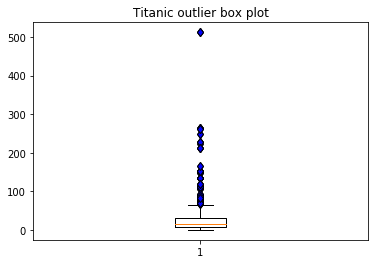

In [30]:
green_diamond = dict(markerfacecolor='b', marker='d')
plt.boxplot([ar['Fare']], flierprops=green_diamond)
plt.title("Titanic outlier box plot")
plt.show()


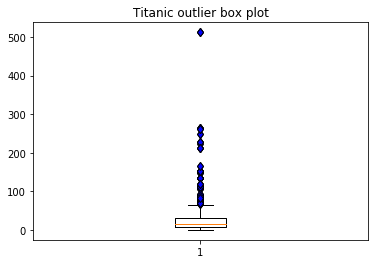

In [31]:
green_diamond = dict(markerfacecolor='b', marker='d')
plt.boxplot([ar_out['Fare']], flierprops=green_diamond)
plt.title("Titanic outlier box plot")
plt.show()

In [32]:
ar_out.loc[ar_out.Fare > 300] 

,Pclass,Age,Fare,Sex,Parch,SibSp,Cabin,Ticket,Embarked,Survived
258,1,35,512.3292,female,0,0,,PC 17755,C,1
679,1,36,512.3292,male,1,0,B51 B53 B55,PC 17755,C,1
737,1,35,512.3292,male,0,0,B101,PC 17755,C,1


Fare outlier -> replace their values with max value except for these outliers. 

In [33]:
ar_out2 = copy.deepcopy(ar_out)

In [34]:
#300 이하 중 최댓값 구하기 

#값이 지워지는 문장 

for i in range (0,len(ar_out2)):
    if ar_out2.Fare[i] > 300:
        ar_out2.Fare[i] = 0

In [36]:
print(max(ar_out.Fare))
print(max(ar_out2.Fare))

512.3292
263.0


In [59]:
for i in range(0,len(ar_out.Fare)):
    if ar_out.Fare[i] > 300:
               ar_out.Fare[i]= 263
        

In [60]:
ar_out.loc[ar_out.Fare > 300]

,Pclass,Age,Fare,Sex,Parch,SibSp,Cabin,Ticket,Embarked,Survived


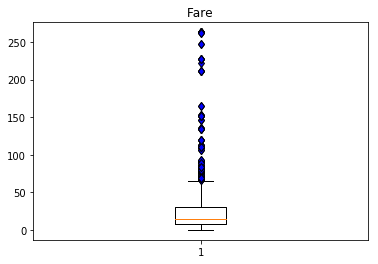

In [63]:
green_diamond = dict(markerfacecolor='b', marker='d')
plt.boxplot([ar_out['Fare']], flierprops=green_diamond)
plt.title("Fare")
plt.show()

#### there is no more outliers over 300 dollars.

### Plotting

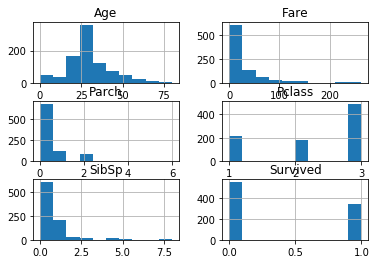

In [69]:
ar_out.hist()
plt.show()

I could see only numeric data is shown on histograms.

### Scatter plot
Now, I will see scatter plot but since the dependent variable in this case is Survival value and it is binary as either 0 or 1, it doesn't seem to be linear when shown on scatter plot with other independent variables. So, I will first see the relation between Survival and other features, then also see the relation between features of numeric with the range. 
Let's see how linear the relation between each feature.


#### Survival & Age

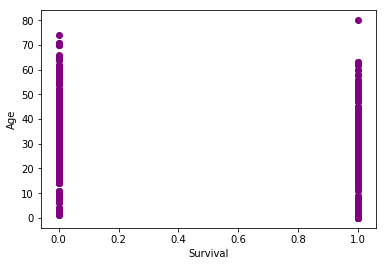

In [70]:
plt.scatter(ar_out.Survived, ar_out.Age, color="purple")
plt.xlabel("Survival")
plt.ylabel("Age")
plt.show()

I can see there is no survived around aged 65-80. Also, there is outlier among survived value, who is aged over 80.

#### Class & Survival

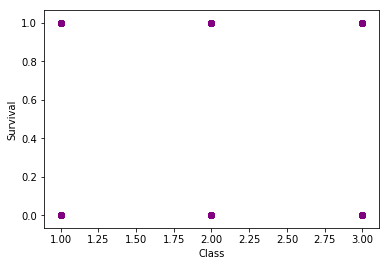

In [71]:
plt.scatter(ar_out.Pclass, ar_out.Survived, color ="purple")
plt.xlabel("Class")
plt.ylabel("Survival")
plt.show()

It seems like it will be better to split data to see the relation between Survival value and other variables for each class.  

#### Survival & Fare

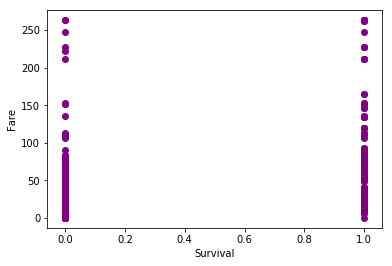

In [72]:
plt.scatter(ar_out.Survived, ar_out.Fare, color ="purple")
plt.xlabel("Survival")
plt.ylabel("Fare")
plt.show()

#### Survival & # of Parent-child 

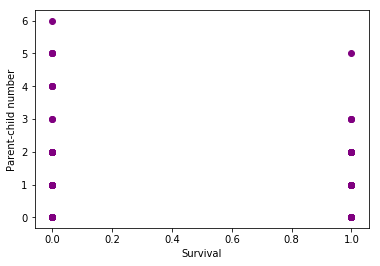

In [74]:
plt.scatter(ar_out.Survived, ar_out.Parch, color ="purple")
plt.xlabel("Survival")
plt.ylabel("Parent-child number")
plt.show()

#### Survival & # of Siblings

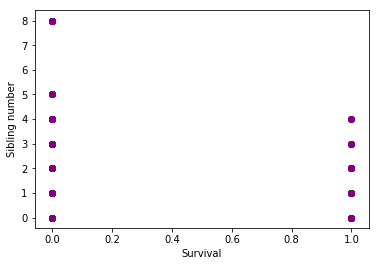

In [75]:
plt.scatter(ar_out.Survived, ar_out.SibSp, color ="purple")
plt.xlabel("Survival")
plt.ylabel("Sibling number")
plt.show()

### Below are plots for relation between each features except for Survival.

#### Class & Age

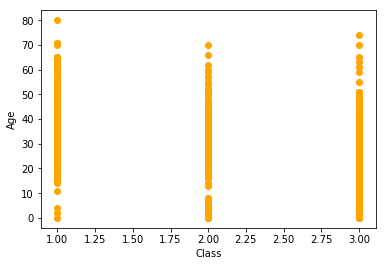

In [76]:
plt.scatter(ar_out.Pclass, ar_out.Age, color ="orange")
plt.xlabel("Class")
plt.ylabel("Age")
plt.show()

##### It will be interesting to see the relation between each class and age. 

#### Parent-Child & age 

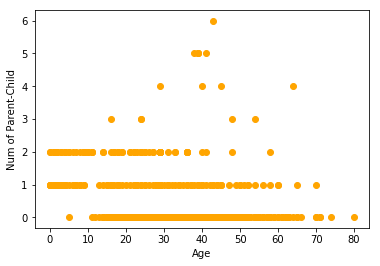

In [77]:
plt.scatter(ar_out.Age, ar_out.Parch, color="orange")
plt.xlabel("Age")
plt.ylabel("Num of Parent-Child")
plt.show()


1. Those who has none parent or child(Parch) is those who aboard alone.
2. Those who has 1 Parch is those who has only one parent or child aboard. Therefore, the number of passengers with one parent or child should be the half of the number of passenger who has '1' as their Parch value. (We haven't counted this number but we can do it later.) 
3. In a same way, in order to know the number of those who has 2 Parent-or-Child aboard, we need to devide the number of passengers with 2 as their Parch value by 3. 


#### Fare & Age

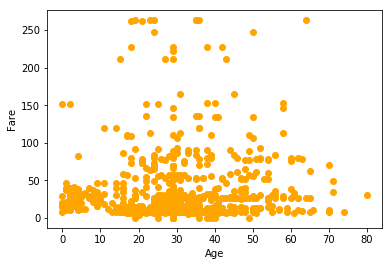

In [78]:
plt.scatter(ar_out.Age,ar_out.Fare,color="orange")
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


##### There is a few outliers around 500 in Fare values, so it should be removed and checked again.  

Most of passengers seems to have had ticket fare under 100.  
Also, there are not many passengers who had over-100 fares among over 60 or under 20.

#### Class & Fare

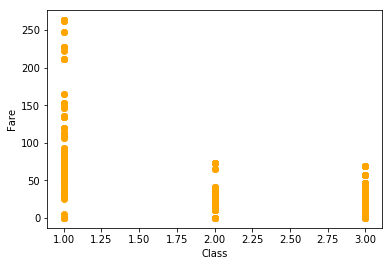

In [79]:
plt.scatter(ar_out.Pclass, ar_out.Fare, color="orange")
plt.xlabel("Class")
plt.ylabel("Fare")
plt.show()

### Modeling

In [115]:
#split test / train data 

#msk = np.random.rand(len(titanic)) < 0.8
#train = sdf[msk]
#test = sdf[~msk]

#this dataset doesn't need to be splited since it is already splited as separate csv file. 

In [80]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

x = np.asanyarray(ar_out[['Pclass']])
y = np.asanyarray(ar_out[['Fare']])

#there will be error if there is any nan value in variables.

In [81]:
regr.fit (x,y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-31.0871201]]
Intercept:  [103.13374608]


Text(0, 0.5, 'Fare')

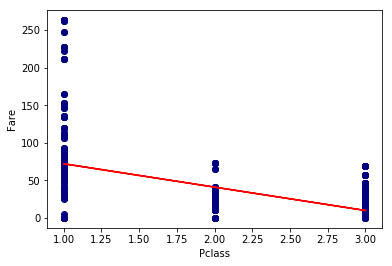

In [82]:
plt.scatter(ar_out.Pclass, ar_out.Fare,  color='navy')
plt.plot(x, regr.coef_[0][0]*x+ regr.intercept_[0], '-r')
plt.xlabel("Pclass")
plt.ylabel("Fare")

Coefficients:  [[0.32966278]]
Intercept:  [21.62504899]


Text(0, 0.5, 'Fare')

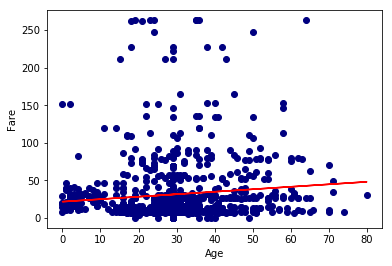

In [87]:
#Fare & Age modeling

x = np.asanyarray(ar_out[['Age']])
y = np.asanyarray(ar_out[['Fare']])

regr.fit (x,y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

plt.scatter(ar_out.Age, ar_out.Fare,  color='navy')
plt.plot(x, regr.coef_[0][0]*x+ regr.intercept_[0], '-r')
plt.xlabel("Age")
plt.ylabel("Fare")

### Evaluation with Test file

In [90]:
test = pd.read_csv("C:/Users/Juyeon/Desktop/My folder/data analysis/titanic/test.csv")

In [91]:
test.info()
test.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [95]:
avg = test.Age.mean()
test.Age = test.Age.fillna(avg)

In [96]:
test.Age.isnull().sum()

0

In [98]:
test.Age = test.Age.astype("int")

In [99]:
test.Age

0      34
1      47
2      62
3      27
4      22
5      14
6      30
7      26
8      18
9      21
10     30
11     46
12     23
13     63
14     47
15     24
16     35
17     21
18     27
19     45
20     55
21      9
22     30
23     21
24     48
25     50
26     22
27     22
28     41
29     30
       ..
388    21
389     6
390    23
391    51
392    13
393    47
394    29
395    18
396    24
397    48
398    22
399    31
400    30
401    38
402    22
403    17
404    43
405    20
406    23
407    50
408    30
409     3
410    30
411    37
412    28
413    30
414    39
415    38
416    30
417    30
Name: Age, Length: 418, dtype: int32

In [110]:
class3 = test.loc[test.Pclass==3]

cnt = Counter(class3['Fare']) 
print(cnt.most_common()[:3]) 

[(7.75, 21), (8.05, 17), (7.8958, 11)]


In [123]:
class3.Fare.isnull().sum()

1

In [125]:
for i in range(0,len(class3)):
    if class3.Fare[i]  :
        class3.Fare[i] = 7.75

NameError: name 'null' is not defined

In [100]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Age']])
test_y = np.asanyarray(test[['Fare']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: nan
Residual sum of squares (MSE): nan


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

R2-score maximum is 1.0 and higher score means better accuracy. 
Thus, this model accuracy is pretty bad with negative score.
##### Question: How is this evaluation related with train data? Is this result only related with test data as itself?


In [117]:
import seaborn as seabornInstance 


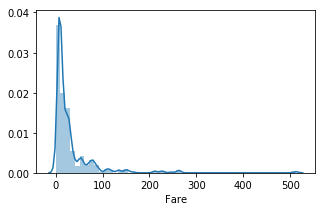

In [126]:
plt.figure(figsize=(5,3))
plt.tight_layout()
seabornInstance.distplot(titanic['Fare'])